In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser

In [ ]:
# python.exe -m pipenv install   
# python.exe -m pipenv install ipykernel  
# python.exe -m pipenv install numpy

# 5pip install matplotlib numpy pandas seaborn

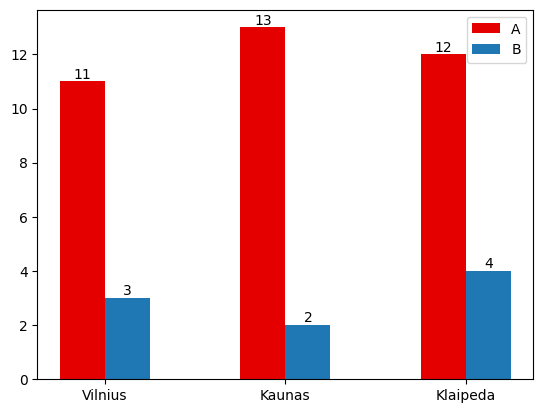

In [4]:
a = np.arange(1,4)
b = np.random.randint(2,15,3)
c = np.random.randint(2,15,3)
labels = ['Vilnius', 'Kaunas', 'Klaipeda']
# 0,8 default stulpelio storis
fig, axis = plt.subplots()
w = 0.25
P = axis.bar(a-w/2, b, label='A', color='xkcd:red', width=w)
B = axis.bar(a+w/2, c, label='B', width=w)

axis.bar_label(P)
axis.bar_label(B)

axis.set_xticks(a)
axis.set_xticklabels(labels)
axis.legend()
plt.show()

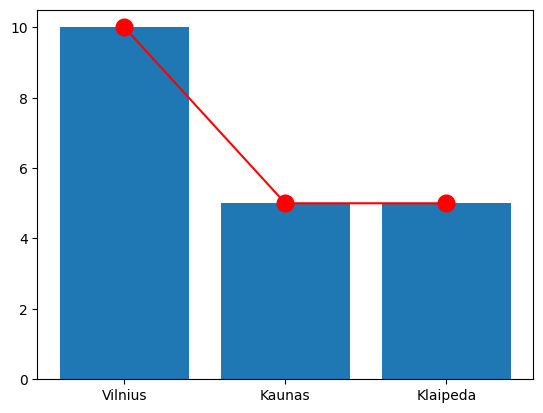

In [15]:
fig, axis = plt.subplots()

axis.bar(labels, b)
axis.plot(a-1, b, marker='o', markersize=12, color='red')

plt.show()

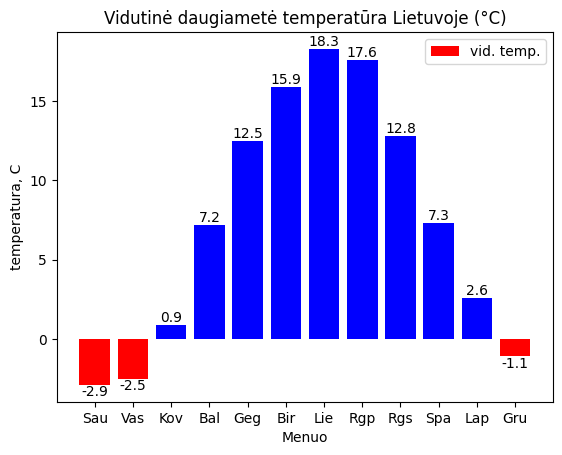

In [36]:
# nubraižykite stulpelinę diagramą, kur būtų 
# atvaizduotos vidutinės ilgametės mėnesių temperatūros
# mėlynas stulpelis turi rodyti neigiamą temperatūrą
# žalias - teigiamą

vs = [-2,-2,+5,+14,+15,+16.4 ,+17.5,+15,+13,+10,+5 ,0]
vv = [-5 ,-5 ,-2 ,0 ,+8 ,+10 ,+11 ,+10 ,+8 ,+2 ,0 ,-5]
month = ["Sau","Vas","Kov","Bal","Geg","Bir","Lie","Rgp","Rgs","Spa","Lap","Gru"]

tc = [-2.9,-2.5,+0.9,+7.2,+12.5,+15.9,+18.3,+17.6,+12.8,+7.3,+2.6,-1.1]
m = ["Sau","Vas","Kov","Bal","Geg","Bir","Lie","Rgp","Rgs","Spa","Lap","Gru"]

fig, axis = plt.subplots()
#  color=(lambda x: 'blue' if x>0 else 'red', vs)

# clr = map(lambda x: 'blue' if x>0 else 'red', vs)
P = axis.bar(month, tc, label="vid. temp.", color=list(map(lambda x: 'blue' if x>0 else 'red', tc)) )
axis.bar_label(P)
# axis.bar(month, vv)
plt.title('Vidutinė daugiametė temperatūra Lietuvoje (°C)')
axis.set_xlabel('Menuo')
axis.set_ylabel('temperatura, C')
axis.legend()
plt.show()

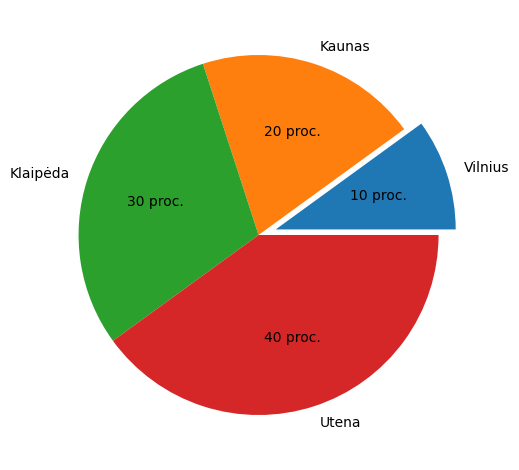

In [56]:
# pie plot
a = [1,2,3,4]
l = ['Vilnius', 'Kaunas', 'Klaipėda', 'Utena']
e = [0.1, 0,0,0]

fig, axis = plt.subplots()
axis.pie(a, labels=l, autopct='%.0f proc.', explode=e)

fig.tight_layout()
plt.show()

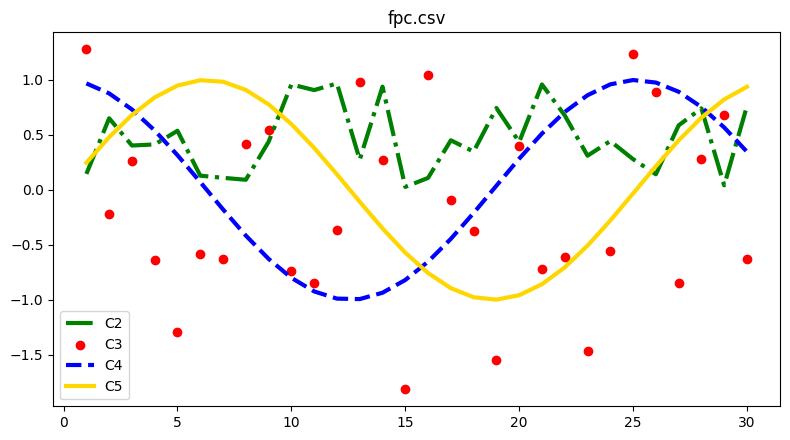

In [53]:
class TxtReader():
    def __init__(self, skirtukas,skip, konvertuoti, fname, stul1, stul2):
        self.konvertuoti = konvertuoti
        self.__x = stul1-1
        self.__y = stul2-1

        with open(fname, mode='r', encoding='utf-8') as file:
            self.turinys = file.readlines()
        
        
        self.col1 = []
        self.col2 = []
        
        for i in self.turinys[skip:]:
            line = i.split(skirtukas)
            self.col1.append(line[self.__x])
            self.col2.append(float(line[self.__y]))
         
        if self.konvertuoti:
            for i in range(len(self.col1)):
                self.col1[i] = parser.parse(self.col1[i]).date()
            
    
        
    def vidurkis(self):
        return np.average(self.col2)

    def mediana(self):
        return np.median(self.col2)
    
    def maximumas(self):
        return np.max(self.col2)
    
    def minimumas(self):
        return np.min(self.col2)
    
    def laikas(self):
        return self.col1
    
    
#nuskaityti ir atvaizduoti fpc.csv failo stulpelius grafiškai 
# x- C1 stulpelis, y - visi kiti likę
# plot, scatte

txt1 = TxtReader(',', 1, False, '../../DATA/fpc.csv', 1, 2)
x = txt1.col1
y1 = txt1.col2

txt2 = TxtReader(',', 1, False, '../../DATA/fpc.csv', 1, 3)
y2 = txt2.col2
txt3 = TxtReader(',', 1, False, '../../DATA/fpc.csv', 1, 4)
y3 = txt3.col2
txt4 = TxtReader(',', 1, False, '../../DATA/fpc.csv', 1, 5)
y4 = txt4.col2


fig, axis = plt.subplots(figsize=(8, 4.5))
axis.plot(x, y1, color='green', lw=3, ls='-.', label = 'C2')
# axis.plot(x, y2, color='red', lw=3, ls=':', label='C3')
axis.scatter(x, y2, color='red', label='C3')
axis.plot(x, y3, color='blue', lw=3, ls='--', label='C4')
axis.plot(x, y4, color='gold', lw=3, ls='-', label='C5')

plt.title('fpc.csv')

axis.legend()
plt.tight_layout()
plt.show()

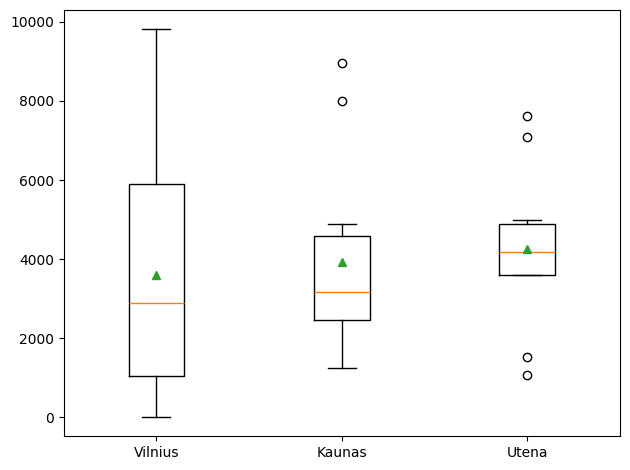

In [63]:
a = np.random.randint(1, 10000,10)
b = np.random.randint(2, 10000,10)
c = np.random.randint(10, 10000,10)

fig, axis = plt.subplots()

# axis.boxplot(a)
# axis.boxplot(b, positions=[2])
axis.boxplot([a, b, c], showmeans=True)
# showfliers=False
axis.set_xticklabels(['Vilnius', 'Kaunas', 'Utena'])

plt.tight_layout()
plt.show()

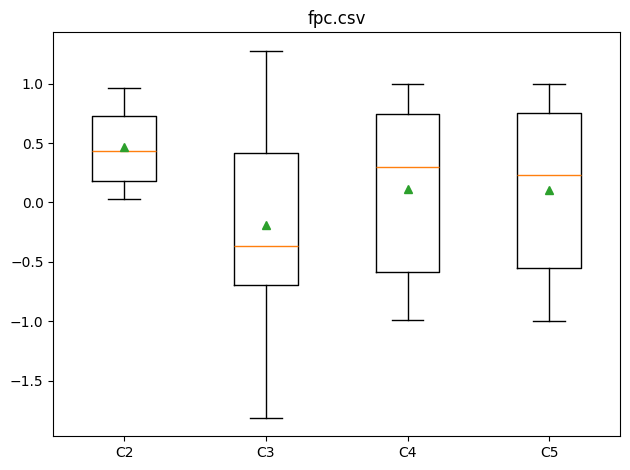

In [72]:
#  tas pats fpc.csv failas.
# Su boxplotais atvaizduokite statistinę informaciją apie 
# stulpelius C2-C5

fig, axis = plt.subplots()

axis.boxplot([y1, y2, y3, y4], showmeans=True)
# showfliers=False
axis.set_xticklabels(['C2', 'C3', 'C4', 'C5'])
plt.title('fpc.csv')
fig.tight_layout()
plt.show()

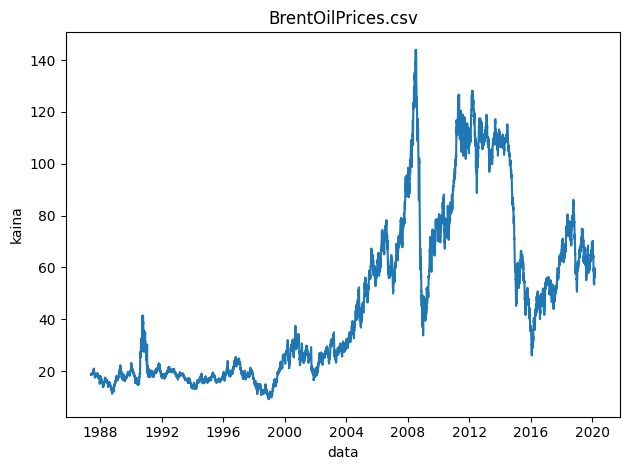

In [5]:
# # BrentOilPrices.csv
# x = datetime iš pirmo stulpelio
# y - tiesiog float'ai iš antro stulpelio
# parser.parse() iš dateutil
# plot()
# open(name, mode='r'

class TxtReader():
    def __init__(self, skirtukas,skip, konvertuoti, fname, stul1, stul2):
        self.konvertuoti = konvertuoti
        self.__x = []
        self.__y = []

        with open(fname, mode='r', encoding='utf-8') as file:
            self.turinys = file.readlines()
        
        
        # self.col1 = []
        # self.col2 = []
        
        for i in self.turinys[skip:]:
            line = i.split(skirtukas)
            self.__x.append(line[stul1-1])
            self.__y.append(float(line[stul2-1]))
         
        if self.konvertuoti:
            for i in range(len(self.__x)):
                self.__x[i] = parser.parse(self.__x[i]).date()
            
    
        
    def vidurkis(self):
        return np.average(self.__y)

    def mediana(self):
        return np.median(self.__y)
    
    def maximumas(self):
        return np.max(self.__y)
    
    def minimumas(self):
        return np.min(self.__y)
    
    def X(self):
        return self.__x
    
    def Y(self):
        return self.__y


oil = TxtReader(',', 1, True, '../../DATA/BrentOilPrices.csv', 1, 2)
x = oil.X()
y = oil.Y()

fig, axis = plt.subplots()

axis.plot(x,y)
axis.set_xlabel('data')
axis.set_ylabel('kaina')
plt.title('BrentOilPrices.csv')
fig.tight_layout()
plt.show()
